<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #075400ff, #037d36ff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       House Price Prediction using XGboosting
    </h1>
</div>


In [277]:
# !pip install xgboost

<h4 style="color:#0ea600ff">1. Importing libraries for data handling, visualization, evaluation metrics, and building an XGBoost regression model</h4>

In [278]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from xgboost import XGBRegressor

<h4 style="color:#0ea600ff">2. Loading the Boston Housing dataset from a CSV file into a Pandas DataFrame</h4>

In [279]:
house = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\Projects\House Price Prediction Using XGboosting\BostonHousing.csv")

<h4 style="color:#0ea600ff">3. Displaying the first five rows of the Boston Housing dataset to preview the data structure</h4>

In [280]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



<h4 style="color:#0ea600ff">4. Generating descriptive statistics of the Boston Housing dataset (mean, std, min, max, quartiles)</h4>

In [281]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<h4 style="color:#0ea600ff">5. Checking the dimensions of the Boston Housing dataset (number of rows and columns)</h4>

In [282]:
house.shape

(506, 14)

<h4 style="color:#0ea600ff">6. Renaming the target column from 'medv' to 'price' and removing the original 'medv' column</h4>

In [283]:
house['price']=house['medv']
house.drop(columns='medv',axis=1,inplace=True)

<h4 style="color:#0ea600ff">7. Printing the entire Boston Housing dataset after renaming the target column</h4>

In [284]:
print(house)

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  price
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...    ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88   11.9

[506 rows x 14 columns]


<h4 style="color:#0ea600ff">8. Checking the dataset for any missing values by summing up all NaNs</h4>

In [285]:
house.isna().sum().sum()

np.int64(0)

<h4 style="color:#0ea600ff">9. Creating a heatmap to visualize the correlation matrix of the Boston Housing dataset and highlighting the relationship between average rooms (RM) and house price</h4>

<Axes: title={'center': 'Relationship between Rooms and Price'}>

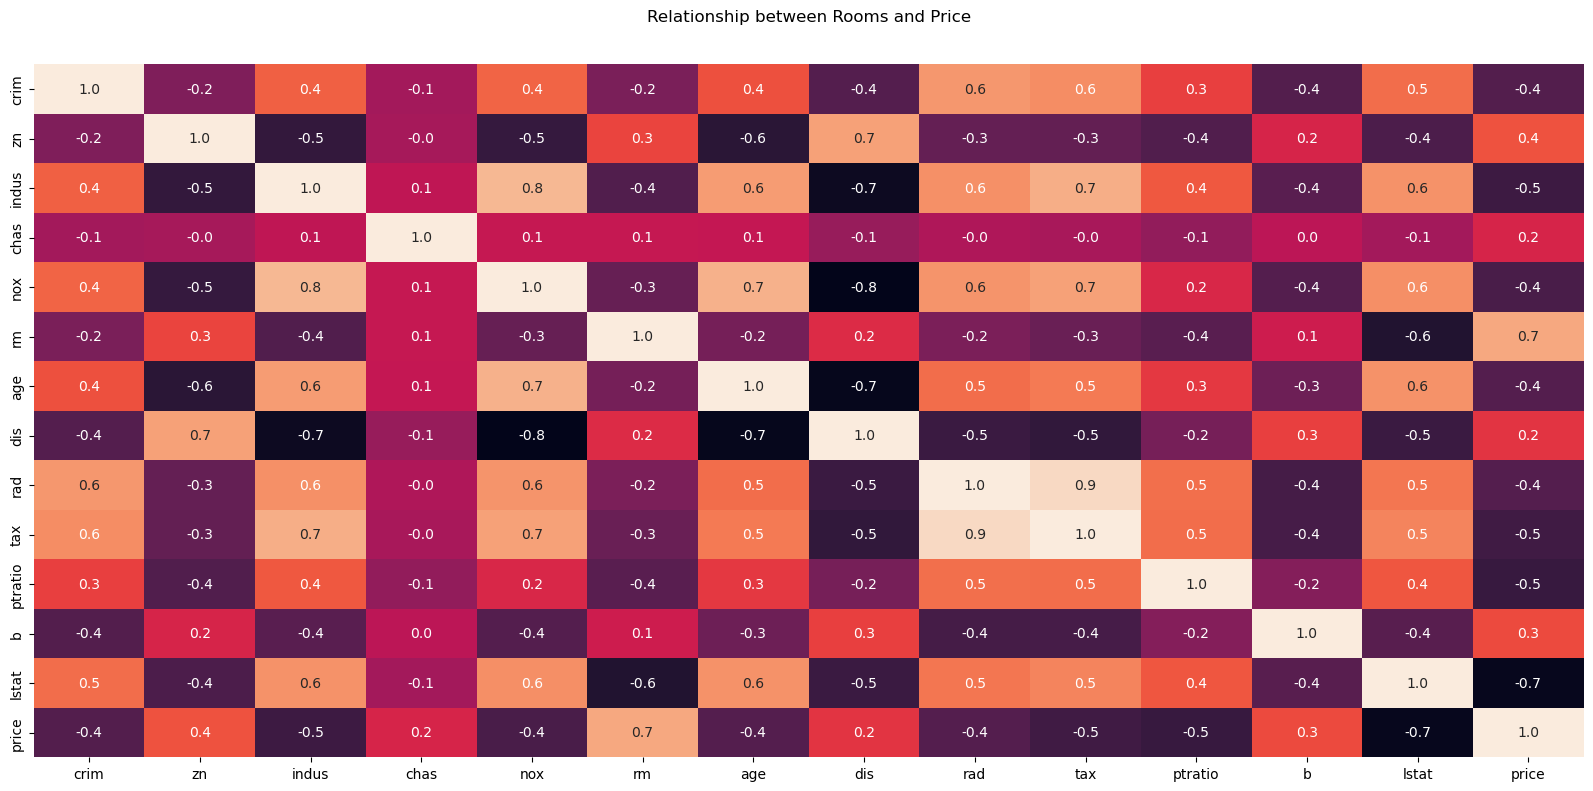

In [286]:
correlation=house.corr()
plt.figure(figsize=(20,9))
plt.xlabel("Average number of rooms (RM)") 
plt.ylabel("House Price (in $1000s)")   
plt.title("Relationship between Rooms and Price",y=1.05)
sns.heatmap(correlation,annot=True,cbar=False,square=False,fmt=".1f")

<h4 style="color:#0ea600ff">10. Splitting the dataset into training and testing sets, then training an XGBoost Regressor model on the training data</h4>

In [287]:
X=house.drop(columns="price",axis=1)
Y=house['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

<h4 style="color:#0ea600ff">11. Evaluating the XGBoost model using 5-fold cross-validation and calculating the mean R² score</h4>

In [288]:
scores = cross_val_score(model, X, Y, scoring='r2', cv=5)
print("R2 mean:", np.mean(scores))

R2 mean: 0.5515684092515121


<h4 style="color:#0ea600ff">12. Predicting on the training set and calculating performance metrics: Mean Squared Error (MSE) and R² score</h4>

In [289]:
Xpredicttrain=model.predict(X_train)
r2_scoretrain=r2_score(Y_train,Xpredicttrain)
MSE=mean_squared_error(Y_train,Xpredicttrain)
print(f"Mean Squared Error IS : {MSE}")
print(f"R Squard IS : {r2_scoretrain}")

Mean Squared Error IS : 0.00016880599071692853
R Squard IS : 0.9999980039471451


<h4 style="color:#0ea600ff">13. Predicting on the test set and evaluating model performance using Mean Squared Error (MSE) and R² score</h4>

In [290]:
XpredictTEST=model.predict(X_test)
r2_scoreTEST=r2_score(Y_test,XpredictTEST)
MSE=mean_squared_error(Y_test,XpredictTEST)
print(f"Mean Squared Error IS : {MSE:.2f}")
print(f"R Squard IS : {r2_scoreTEST:.2f}")

Mean Squared Error IS : 7.93
R Squard IS : 0.91


<h4 style="color:#0ea600ff">14. Visualizing the model’s performance by plotting Actual vs Predicted house prices on the test set</h4>

Text(0.5, 1.05, 'Actual price Vs Predict Price')

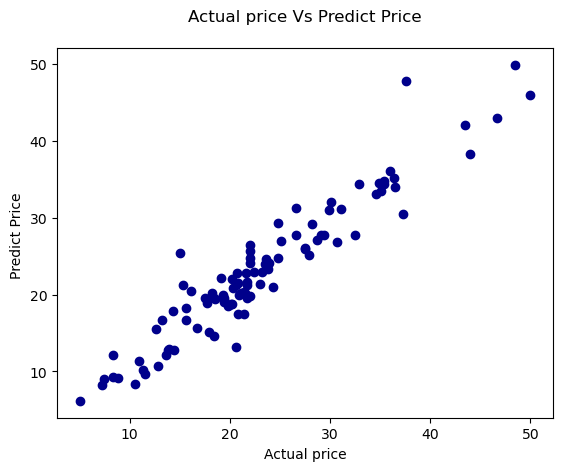

In [291]:
XpredictTEST=model.predict(X_test)
plt.scatter(Y_test,XpredictTEST,color="darkblue")
plt.xlabel("Actual price")
plt.ylabel("Predict Price ")
plt.title("Actual price Vs Predict Price",y=1.05)

<h4 style="color:#0ea600ff">15. Plotting residuals (Actual − Predicted) to analyze model errors and check prediction patterns</h4>

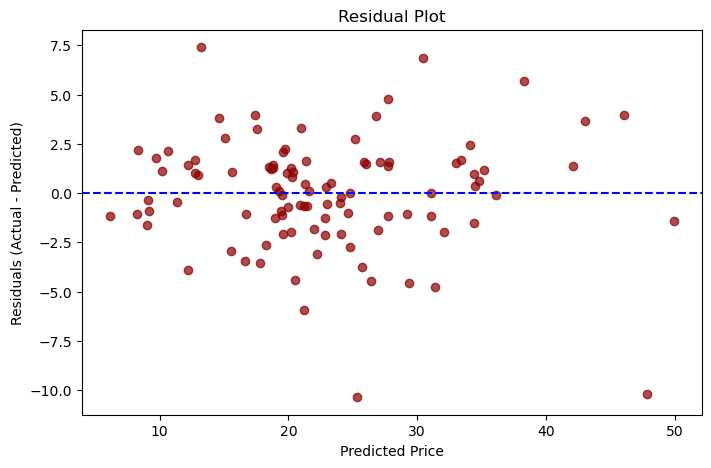

In [292]:
residuals = Y_test - XpredictTEST
plt.figure(figsize=(8,5))
plt.scatter(XpredictTEST, residuals, alpha=0.7, color="darkred")
plt.axhline(0, color="blue", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()